In [5]:
import re

<link href="style.css" rel="stylesheet"></link>

<article class="day-desc"><h2>--- Day 4: Scratchcards ---</h2><p>The gondola takes you up. Strangely, though, the ground doesn't seem to be coming with you; you're not climbing a mountain. As the circle of Snow Island recedes below you, an entire new landmass suddenly appears above you! The gondola carries you to the surface of the new island and lurches into the station.</p>
<p>As you exit the gondola, the first thing you notice is that the air here is much <em>warmer</em> than it was on Snow Island. It's also quite <em>humid</em>. Is this where the water source is?</p>
<p>The next thing you notice is an Elf sitting on the floor across the station in what seems to be a pile of colorful square cards.</p>
<p>"Oh! Hello!" The Elf excitedly runs over to you. "How may I be of service?" You ask about water sources.</p>
<p>"I'm not sure; I just operate the gondola lift. That does sound like something we'd have, though - this is <em><span title="I find this way funnier than it has any right to be.">Island Island</span></em>, after all! I bet the <em>gardener</em> would know. He's on a different island, though - er, the small kind surrounded by water, not the floating kind. We really need to come up with a better naming scheme. Tell you what: if you can help me with something quick, I'll let you <em>borrow my boat</em> and you can go visit the gardener. I got all these <a href="https://en.wikipedia.org/wiki/Scratchcard" target="_blank">scratchcards</a> as a gift, but I can't figure out what I've won."</p>
<p>The Elf leads you over to the pile of colorful cards. There, you discover dozens of scratchcards, all with their opaque covering already scratched off. Picking one up, it looks like each card has two lists of numbers separated by a vertical bar (<code>|</code>): a list of <em>winning numbers</em> and then a list of <em>numbers you have</em>. You organize the information into a table (your puzzle input).</p>
<p>As far as the Elf has been able to figure out, you have to figure out which of the <em>numbers you have</em> appear in the list of <em>winning numbers</em>. The first match makes the card worth <em>one point</em> and each match after the first <em>doubles</em> the point value of that card.</p>
<p>For example:</p>
<pre><code>Card 1: 41 48 83 86 17 | 83 86  6 31 17  9 48 53
Card 2: 13 32 20 16 61 | 61 30 68 82 17 32 24 19
Card 3:  1 21 53 59 44 | 69 82 63 72 16 21 14  1
Card 4: 41 92 73 84 69 | 59 84 76 51 58  5 54 83
Card 5: 87 83 26 28 32 | 88 30 70 12 93 22 82 36
Card 6: 31 18 13 56 72 | 74 77 10 23 35 67 36 11
</code></pre>
<p>In the above example, card 1 has five winning numbers (<code>41</code>, <code>48</code>, <code>83</code>, <code>86</code>, and <code>17</code>) and eight numbers you have (<code>83</code>, <code>86</code>, <code>6</code>, <code>31</code>, <code>17</code>, <code>9</code>, <code>48</code>, and <code>53</code>). Of the numbers you have, four of them (<code>48</code>, <code>83</code>, <code>17</code>, and <code>86</code>) are winning numbers! That means card 1 is worth <code><em>8</em></code> points (1 for the first match, then doubled three times for each of the three matches after the first).</p>
<ul>
<li>Card 2 has two winning numbers (<code>32</code> and <code>61</code>), so it is worth <code><em>2</em></code> points.</li>
<li>Card 3 has two winning numbers (<code>1</code> and <code>21</code>), so it is worth <code><em>2</em></code> points.</li>
<li>Card 4 has one winning number (<code>84</code>), so it is worth <code><em>1</em></code> point.</li>
<li>Card 5 has no winning numbers, so it is worth no points.</li>
<li>Card 6 has no winning numbers, so it is worth no points.</li>
</ul>
<p>So, in this example, the Elf's pile of scratchcards is worth <code><em>13</em></code> points.</p>
<p>Take a seat in the large pile of colorful cards. <em>How many points are they worth in total?</em></p>
</article>


In [6]:
s = """Card 1: 41 48 83 86 17 | 83 86  6 31 17  9 48 53
Card 2: 13 32 20 16 61 | 61 30 68 82 17 32 24 19
Card 3:  1 21 53 59 44 | 69 82 63 72 16 21 14  1
Card 4: 41 92 73 84 69 | 59 84 76 51 58  5 54 83
Card 5: 87 83 26 28 32 | 88 30 70 12 93 22 82 36
Card 6: 31 18 13 56 72 | 74 77 10 23 35 67 36 11"""

In [7]:
def score(s: str) -> int:
    score = 0
    for line in s.splitlines():
        winners_str, mine_str = line.split(":")[1].split("|")
        winners = {int(i) for i in re.findall(r"\d+", winners_str)}
        mine = {int(i) for i in re.findall(r"\d+", mine_str)}
        winning_numbers = len(winners & mine) - 1
        score += 2**winning_numbers if winning_numbers > -1 else 0
    return score


score(s) == 13

True

In [8]:
with open("./input/day4.txt") as f:
    print(score(f.read()))

21919


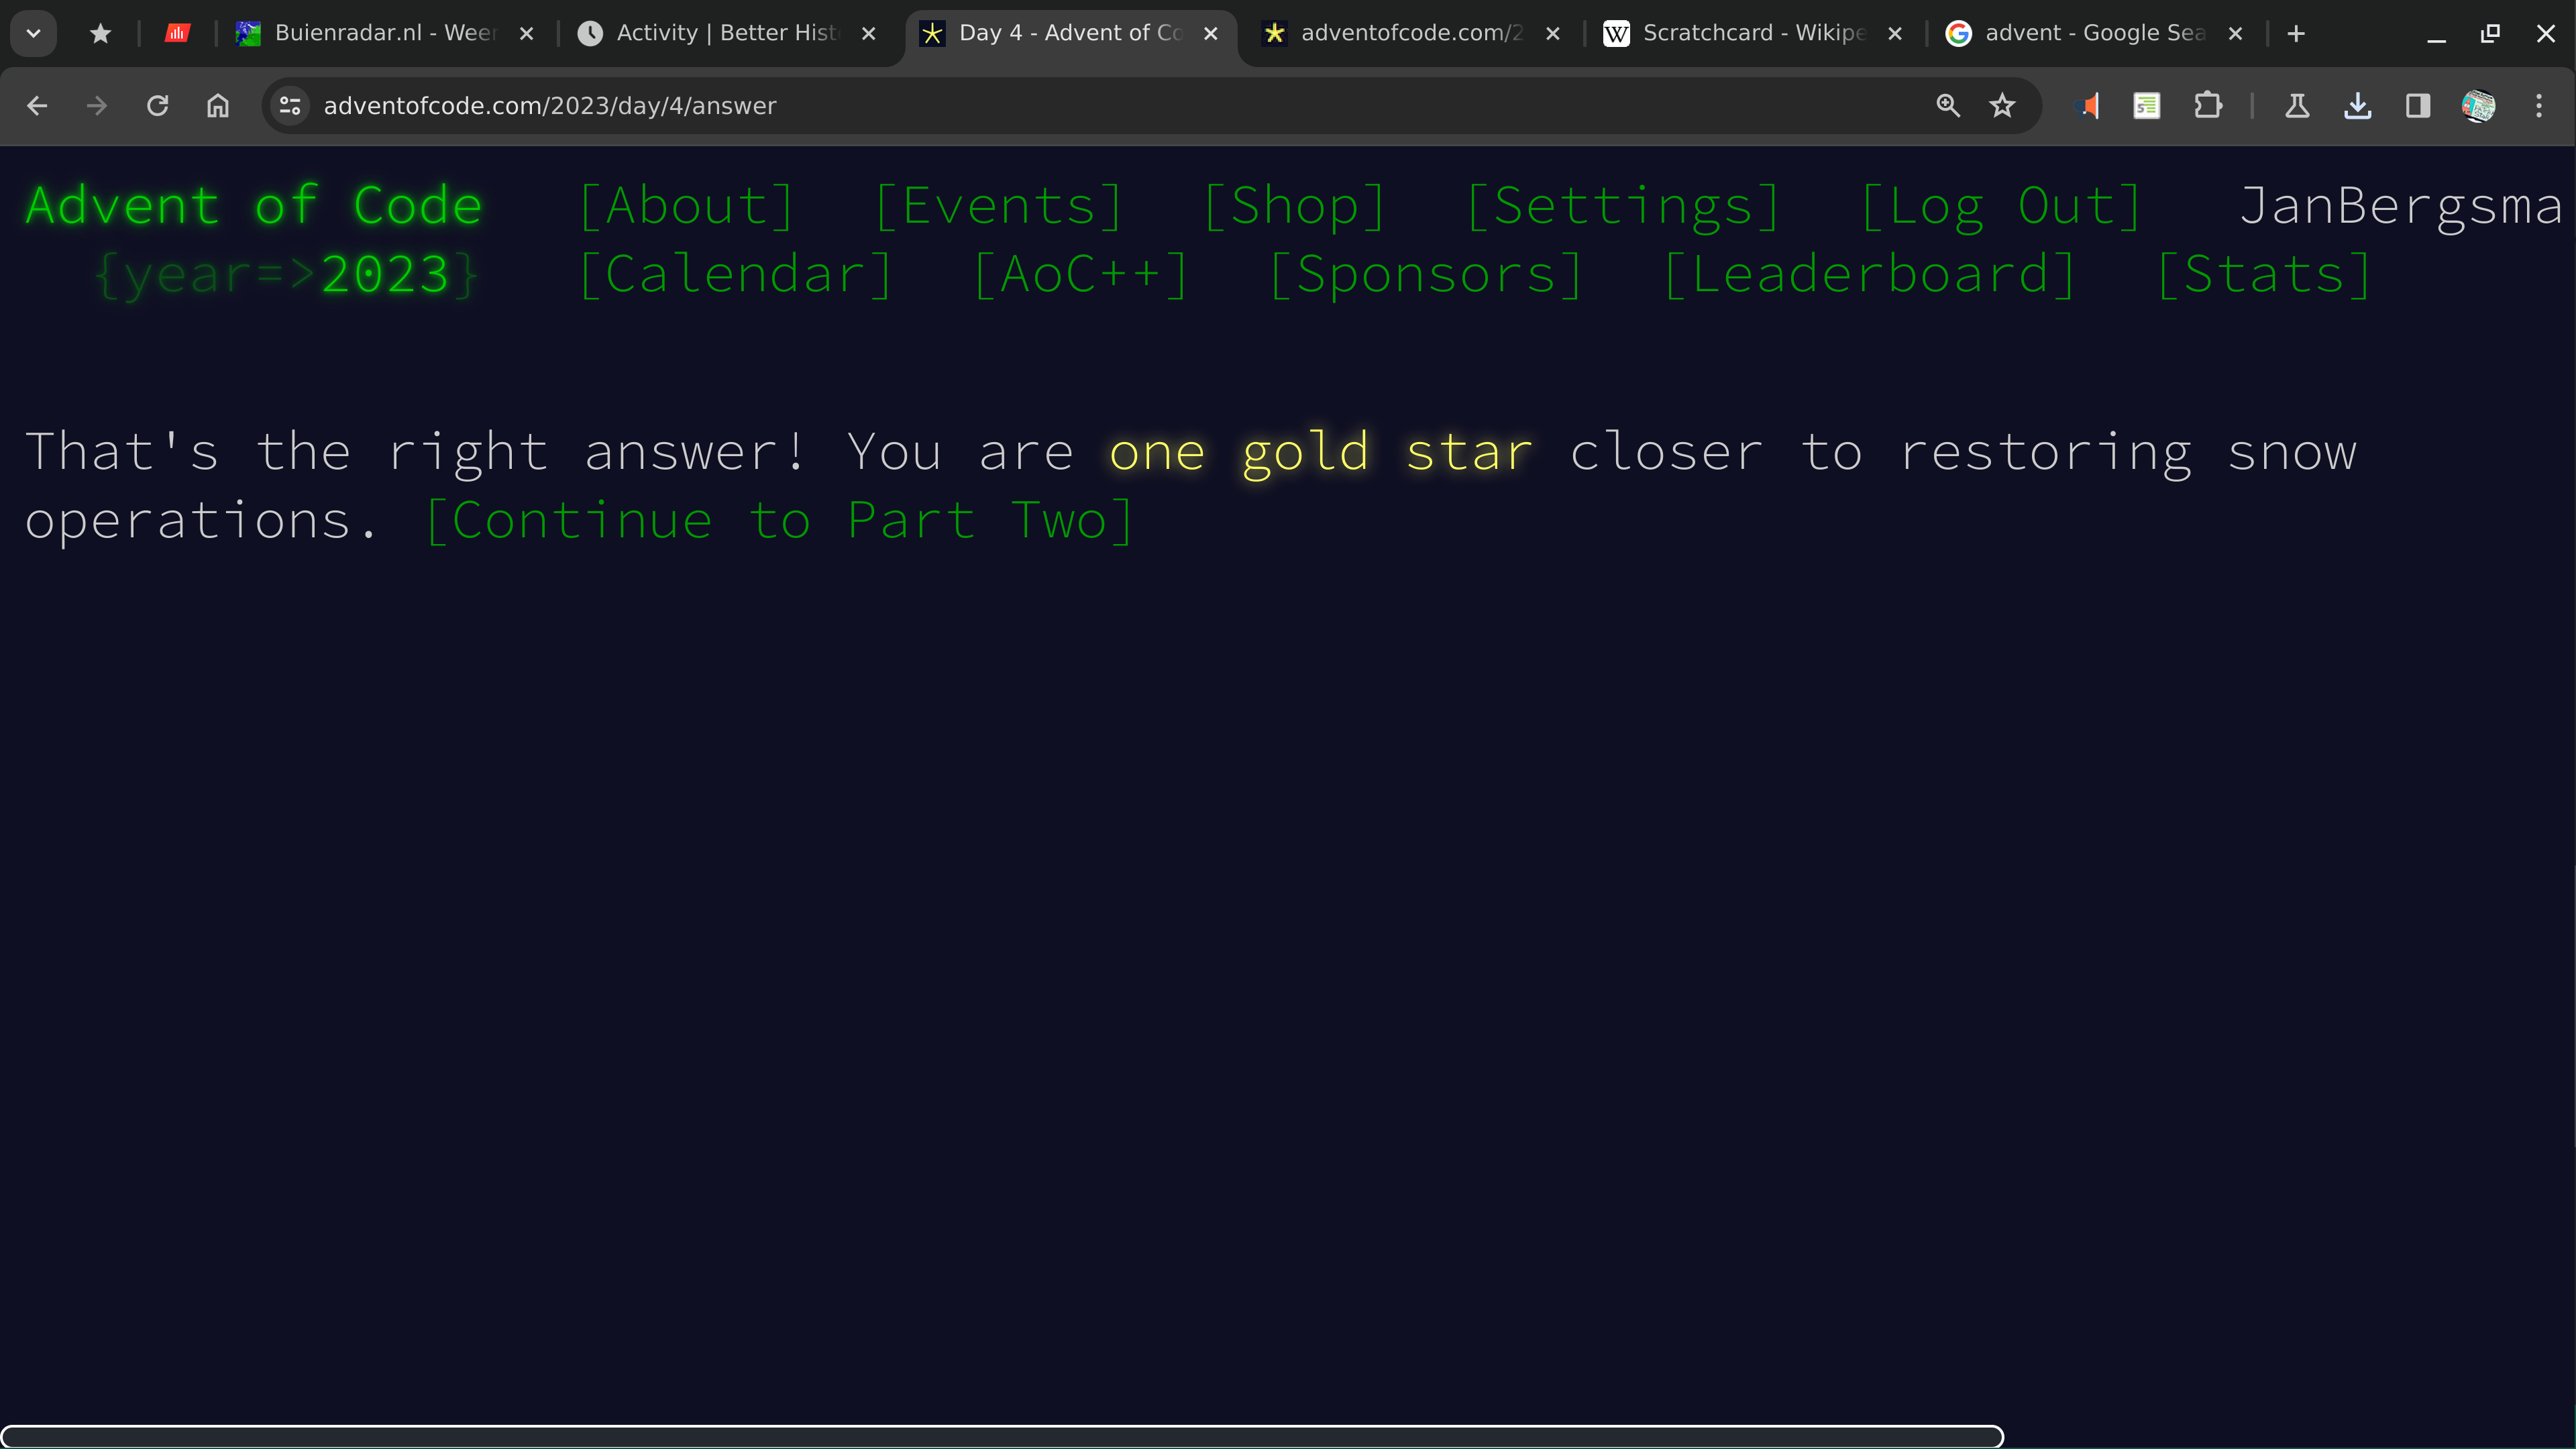


<link href="style.css" rel="stylesheet"></link>
<p>Your puzzle answer was <code>21919</code>.</p>
<p class="day-success">The first half of this puzzle is complete! It provides one gold star: *</p>


<link href="style.css" rel="stylesheet"></link>

<article class="day-desc"><h2 id="part2">--- Part Two ---</h2><p>Just as you're about to report your findings to the Elf, one of you realizes that the rules have actually been printed on the back of every card this whole time.</p>
<p>There's no such thing as "points". Instead, scratchcards only cause you to <em>win more scratchcards</em> equal to the number of winning numbers you have.</p>
<p>Specifically, you win <em>copies</em> of the scratchcards below the winning card equal to the number of matches. So, if card 10 were to have 5 matching numbers, you would win one copy each of cards 11, 12, 13, 14, and 15.</p>
<p>Copies of scratchcards are scored like normal scratchcards and have the <em>same card number</em> as the card they copied. So, if you win a copy of card 10 and it has 5 matching numbers, it would then win a copy of the same cards that the original card 10 won: cards 11, 12, 13, 14, and 15. This process repeats until none of the copies cause you to win any more cards. (Cards will never make you copy a card past the end of the table.)</p>
<p>This time, the above example goes differently:</p>
<pre><code>Card 1: 41 48 83 86 17 | 83 86  6 31 17  9 48 53
Card 2: 13 32 20 16 61 | 61 30 68 82 17 32 24 19
Card 3:  1 21 53 59 44 | 69 82 63 72 16 21 14  1
Card 4: 41 92 73 84 69 | 59 84 76 51 58  5 54 83
Card 5: 87 83 26 28 32 | 88 30 70 12 93 22 82 36
Card 6: 31 18 13 56 72 | 74 77 10 23 35 67 36 11
</code></pre>
<ul>
<li>Card 1 has four matching numbers, so you win one copy each of the next four cards: cards 2, 3, 4, and 5.</li>
<li>Your original card 2 has two matching numbers, so you win one copy each of cards 3 and 4.</li>
<li>Your copy of card 2 also wins one copy each of cards 3 and 4.</li>
<li>Your four instances of card 3 (one original and three copies) have two matching numbers, so you win <em>four</em> copies each of cards 4 and 5.</li>
<li>Your eight instances of card 4 (one original and seven copies) have one matching number, so you win <em>eight</em> copies of card 5.</li>
<li>Your fourteen instances of card 5 (one original and thirteen copies) have no matching numbers and win no more cards.</li>
<li>Your one instance of card 6 (one original) has no matching numbers and wins no more cards.</li>
</ul>
<p>Once all of the originals and copies have been processed, you end up with <code><em>1</em></code> instance of card 1, <code><em>2</em></code> instances of card 2, <code><em>4</em></code> instances of card 3, <code><em>8</em></code> instances of card 4, <code><em>14</em></code> instances of card 5, and <code><em>1</em></code> instance of card 6. In total, this example pile of scratchcards causes you to ultimately have <code><em>30</em></code> scratchcards!</p>
<p>Process all of the original and copied scratchcards until no more scratchcards are won. Including the original set of scratchcards, <em>how many total scratchcards do you end up with?</em></p>
</article>


In [9]:
s = """
Card 1: 41 48 83 86 17 | 83 86  6 31 17  9 48 53
Card 2: 13 32 20 16 61 | 61 30 68 82 17 32 24 19
Card 3:  1 21 53 59 44 | 69 82 63 72 16 21 14  1
Card 4: 41 92 73 84 69 | 59 84 76 51 58  5 54 83
Card 5: 87 83 26 28 32 | 88 30 70 12 93 22 82 36
Card 6: 31 18 13 56 72 | 74 77 10 23 35 67 36 11
"""

In [19]:
def determine_number_of_scrachcards_left(s: str) -> int:
    lines = s.splitlines()
    cards = {i: 1 for i in range(1, len(lines) + 1)}
    for card, line in enumerate(lines, start=1):
        winners_str, mine_str = line.split(":")[1].split("|")
        winners = {int(i) for i in re.findall(r"\d+", winners_str)}
        mine = {int(i) for i in re.findall(r"\d+", mine_str)}
        winning_numbers = len(winners & mine)
        for d in range(1, winning_numbers + 1):
            cards[card + d] = cards.get(card + d, 0) + cards[card]
    return sum(cards.values())


assert determine_number_of_scrachcards_left(s.strip()) == 30

In [21]:
with open("./input/day4.txt") as f:
    assert determine_number_of_scrachcards_left(f.read()) == 9881048

<link href="style.css" rel="stylesheet"></link>

<main>
<article><p>That's the right answer!  You are <span class="day-success">one gold star</span> closer to restoring snow operations.</p><p>You have completed Day 4! You can <span class="share">[Share<span class="share-content">on
  <a href="https://twitter.com/intent/tweet?text=I+just+completed+%22Scratchcards%22+%2D+Day+4+%2D+Advent+of+Code+2023&amp;url=https%3A%2F%2Fadventofcode%2Ecom%2F2023%2Fday%2F4&amp;related=ericwastl&amp;hashtags=AdventOfCode" target="_blank">Twitter</a>
  <a href="javascript:void(0);" onclick="var ms; try{ms=localStorage.getItem('mastodon.server')}finally{} if(typeof ms!=='string')ms=''; ms=prompt('Mastodon Server?',ms); if(typeof ms==='string' &amp;&amp; ms.length){this.href='https://'+ms+'/share?text=I+just+completed+%22Scratchcards%22+%2D+Day+4+%2D+Advent+of+Code+2023+%23AdventOfCode+https%3A%2F%2Fadventofcode%2Ecom%2F2023%2Fday%2F4';try{localStorage.setItem('mastodon.server',ms);}finally{}}else{return false;}" target="_blank">Mastodon</a></span>]</span> this victory or <a href="/2023">[Return to Your Advent Calendar]</a>.</p></article>
</main>


<link href="style.css" rel="stylesheet"></link>
<main>

<p>Your puzzle answer was <code>9881048</code>.</p><p class="day-success">Both parts of this puzzle are complete! They provide two gold stars: **</p>
<p>At this point, you should <a href="/2023">return to your Advent calendar</a> and try another puzzle.</p>
<p>If you still want to see it, you can <a href="4/input" target="_blank">get your puzzle input</a>.</p>
<p>You can also <span class="share">[Share<span class="share-content">on
  <a href="https://twitter.com/intent/tweet?text=I%27ve+completed+%22Scratchcards%22+%2D+Day+4+%2D+Advent+of+Code+2023&amp;url=https%3A%2F%2Fadventofcode%2Ecom%2F2023%2Fday%2F4&amp;related=ericwastl&amp;hashtags=AdventOfCode" target="_blank">Twitter</a>
  <a href="javascript:void(0);" onclick="var ms; try{ms=localStorage.getItem('mastodon.server')}finally{} if(typeof ms!=='string')ms=''; ms=prompt('Mastodon Server?',ms); if(typeof ms==='string' &amp;&amp; ms.length){this.href='https://'+ms+'/share?text=I%27ve+completed+%22Scratchcards%22+%2D+Day+4+%2D+Advent+of+Code+2023+%23AdventOfCode+https%3A%2F%2Fadventofcode%2Ecom%2F2023%2Fday%2F4';try{localStorage.setItem('mastodon.server',ms);}finally{}}else{return false;}" target="_blank">Mastodon</a></span>]</span> this puzzle.</p>
</main>
